In [1]:
from packages.display.core import *
%pylab inline
pylab.rcParams['figure.figsize'] = (200, 5)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
%qtconsole

# Data Cubes

### Band 9, Fixed Width

In [2]:
cube_params = {
  'freq'     : 604000,
  'alpha'    : 0,
  'delta'    : 0,
  'spe_bw'   : 4000,
  'spe_res'  : 1,
  's_f'      : 8,
  's_a'      : 0}

C:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


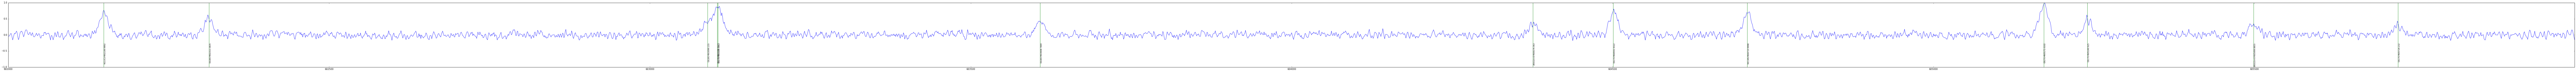

In [3]:
cube_name = 'data/cube_fixed_width_'

x = get_freq_index_from_params(cube_params)

for i in range(0, 1):
    file_path = cube_name + str(i) + '.fits'
    train_pixel = (1, 1)
    y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
    plt.plot(x, y)
    plt.legend(loc='upper right')
    plt.xlim(xmin = x[0], xmax = x[-1])
    plt.ylim(ymin = -1,ymax = 1)
    
    lines = get_lines_from_fits(file_path)
    for line in lines:
        # Shows lines really present
        isotope_frequency = int(line[1])
        isotope_name = line[0] + "-f" + str(line[1])

        plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g')
        plt.text(isotope_frequency, -0.3, isotope_name, size='8', rotation='vertical')
    
    plt.show()

#### Cube 1

### Dictionary Band 9

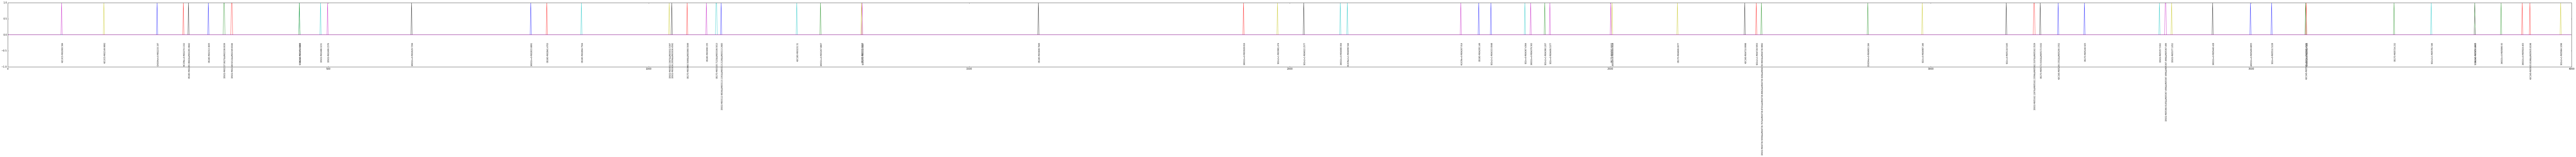

In [82]:
dictionary = load_dictionary('band_9_dual')
plt.ylim(ymin = -1,ymax = 1)
for isotope in dictionary.columns:
    for idx in range(0, len(dictionary[isotope])):
        if (dictionary[isotope].iloc[idx] !=0):
            plt.text(idx, -0.3, isotope, size='8', rotation='vertical')
            break
    plt.plot(dictionary[isotope])
plt.show()

#### Dictionary Recalculated Cube 1 Band 9

In [98]:
cube_name = 'data/cube_fixed_width_'
file_path = cube_name + str(1) + '.fits'

dictionary = load_dictionary('band_9_dual')

train_pixel = (1, 1)
dictionary_recal, detected_peaks = recal_words(file_path, dictionary, cube_params)

X = get_values_filtered_normalized(file_path, train_pixel, cube_params)

y_train = get_fortran_array(np.asmatrix(X))
dictionary_recal_fa = np.asfortranarray(dictionary_recal,
                                        dtype= np.double)

C:\Python\2.7\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


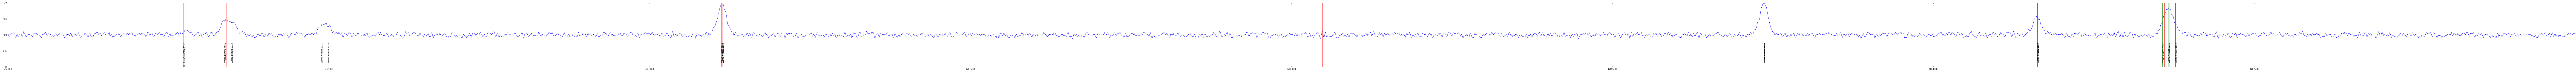

In [350]:
x = get_freq_index_from_params(cube_params)
y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
plt.plot(x, y)
plt.xlim(xmin = x[0], xmax = x[-1])
plt.ylim(ymin = -1,ymax = 1)

lines = get_lines_from_fits(file_path)
for line in lines:
    # Shows lines really present
    isotope_frequency = int(line[1])
    isotope_name = line[0] + "-f" + str(line[1])

    plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g')
    plt.text(isotope_frequency, -0.3, isotope_name, size='8', rotation='vertical')

lambda_param = 0
for idx in range(0, len(detected_peaks)):
    if detected_peaks[idx] != 0:
        plt.axvline(x=x[idx], ymin=0, ymax= 1, color='r', label='Detected peak' if idx == 0 else "")
        lambda_param += 1
plt.legend(loc='upper right')
plt.show()

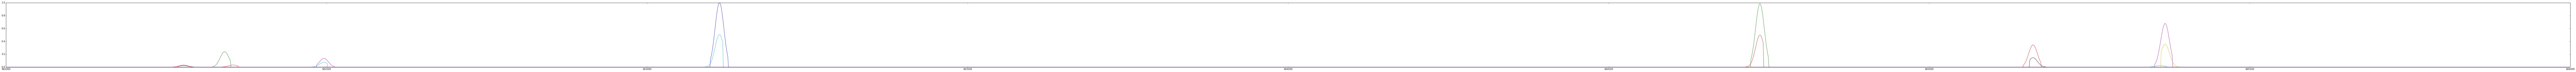

In [115]:
x = get_freq_index_from_params(cube_params)
plt.plot(x, dictionary_recal_fa)
plt.show()

In [343]:
param = {
  'lambda1' : lambda_param,
  # 'L': 1,
  'pos' : True,
  'mode' : 0,
  'ols' : True,
  'numThreads' : -1}

alpha = spams.lasso(y_train, dictionary_recal_fa, **param).toarray()
total = np.inner(dictionary_recal_fa, alpha.T)

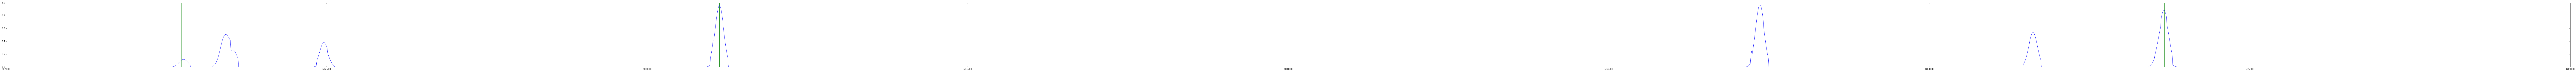

In [345]:
lines = get_lines_from_fits(file_path)
for line in lines:
    # Shows lines really present
    isotope_frequency = int(line[1])
    isotope_name = line[0] + "-f" + str(line[1])

    plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g')
    # plt.text(isotope_frequency, -0.3, isotope_name, size='8', rotation='vertical')

x = get_freq_index_from_params(cube_params)
plt.plot(x, total)
    
plt.show()

In [346]:
confusion_matrix = get_confusion_matrix(dictionary_recal, alpha,
                                           file_path, cube_params, True)

In [347]:
confusion_matrix

,33SO2-f602337.0627&&f602338.0039,33SO2-f602348.9212&&f602349.8184,33SO2-f602488.3231,33SO2-f602499.1576,33SO2-f603112.9816&&f603113.1191&&f603113.2126&&f603113.2683,33SO2-f604736.5656&&f604736.767&&f604736.8741&&f604736.8962&&f604736.926&&f604736.9663&&f604736.9892,33SO2-f605162.1267&&f605162.2359&&f605162.3107&&f605162.3529,33SO2-f605357.5302,33SO2-f605366.9145&&f605367.499,33SO2-f605377.1052,HC15Nv=0-f602274.1332
33SO2-f602337.0627&&f602338.0039,0.095718,0.095718,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
33SO2-f602348.9212&&f602349.8184,0.404282,0.404282,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
33SO2-f602488.3231,0.000000,0.000000,0.29744,0.29744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
33SO2-f602499.1576,0.000000,0.000000,0.70256,0.70256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
33SO2-f603112.9816&&f603113.1191&&f603113.2126&&f603113.2683,0.000000,0.000000,0.00000,0.00000,0.220243,0.000000,0.000000,0.000000,0.000000,0.000000,0
33SO2-f604736.5656&&f604736.767&&f604736.8741&&f604736.8962&&f604736.926&&f604736.9663&&f604736.9892,0.000000,0.000000,0.00000,0.00000,0.000000,0.119848,0.000000,0.000000,0.000000,0.000000,0
33SO2-f605162.1267&&f605162.2359&&f605162.3107&&f605162.3529,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.223823,0.000000,0.000000,0.000000,0
33SO2-f605357.5302,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.931624,0.449752,0.000000,0
33SO2-f605366.9145&&f605367.499&&f605367.499&&f605367.499&&f605367.499,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.068376,0.033009,0.656925,0
33SO2-f605377.1052,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.017239,0.343075,0


In [340]:
results = get_results(confusion_matrix)

In [341]:
results

,Precision,Recall,F-Score
33SO2-f602337.0627&&f602338.0039,0.191437,0.500000,0.276868
33SO2-f602348.9212&&f602349.8184,0.808563,0.500000,0.617902
33SO2-f602488.3231,0.297440,0.500000,0.372993
33SO2-f602499.1576,0.702560,0.500000,0.584220
33SO2-f603112.9816&&f603113.1191&&f603113.2126&&f603113.2683,0.880974,1.000000,0.936721
33SO2-f604736.5656&&f604736.767&&f604736.8741&&f604736.8962&&f604736.926&&f604736.9663&&f604736.9892,0.838939,1.000000,0.912416
33SO2-f605162.1267&&f605162.2359&&f605162.3107&&f605162.3529,0.895294,1.000000,0.944754
33SO2-f605357.5302,0.931624,0.674418,0.782425
33SO2-f605366.9145&&f605367.499,0.000000,0.000000,0.000000
33SO2-f605377.1052,0.343075,0.952156,0.504405


In [349]:
[line[2] for line in lines]

[0.026821200680950237,
 0.026821200680950237,
 0.026821174753802118,
 0.026821161343218075,
 0.031974273030169628,
 0.031974226134603559,
 0.036164084241555206,
 0.036164084241555219,
 0.036164084241555219,
 0.036164084241555219,
 0.019990874177644644,
 0.019990874177644641,
 0.01952597012700175,
 0.019525970127001746,
 0.019990874177644648,
 0.019990874177644644,
 0.019990874177644651,
 0.022376281694820484,
 0.022376281694820494,
 0.022376281694820491,
 0.022376281694820494,
 0.022952937982285006,
 0.02295293798228501,
 0.02295293798228501,
 0.02295297164661873,
 0.01589654323026634]

In [348]:
np.mean(results["F-Score"])

0.63024589778674689